In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
df = pd.read_excel('/Users/tiffany/Downloads/Spotify_data.xlsx')
df.shape

(520, 20)

# Data Road 및 전처리
- 문자형 데이터가 많음

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [4]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [5]:
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

In [6]:
# 나이 자체보다는 연령대를 구분해놓음 20~35세가 압도적으로 높음
df['Age'].value_counts()

Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

In [7]:
# 여성이 남성보다 3배 이상 높네? 스포티파이 앱 자체를 여성이 더 많이 쓰는가? 확인해보자 ★
df['Gender'].value_counts()

Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64

- 실제로 한국 론칭 후 21년 3월 이후 꾸준히 사용자 수 증가하는데 
    - 이용자의 60% 이상이 29세 미만의 연령대였으며 성비는 여성이 57.43%로 남성보다 많았다고 함

## 컬럼 별 value_counts
- spotify_usage_period : 1년-2년, 2년 이상, 6개월-1년 대부분 비슷하게 높음, 신규 고객(6개월미만)보다 오래 사용한 유저 수가 더 많음
    - 신규 유저를 모객하기 위해서 어떻게 해야할지 전략 필요
- spotify_listening_device : 스마트폰 압도적으로 높고 다른 기기 함께 사용하는 유저 적음
- spotify_subscription_plan : 구독플랜방법
- 광고를 보더라도 무료로 사용하는 유저 4배이상 높음. 유료 고객 높일 전략 필요. 스포티파이의 BM 확인 필요
- premium_sub_willingness : 유료전환의지유료전환의지
- 이슈다. 유저들이 미래에 돈을 좀 더 내서 프리미엄을 하거나 앞으로 계쏙해서 프리미엄 구독을 유지할 의지가 없다
- preffered_premium_plan : 플랜선호도조사
    - Individual Plan- Rs 119/month (개인 플랜 - 월 119루피): 95명이 이 플랜을 선호합니다.
    - Student Plan-Rs 59/month (학생 플랜 - 월 59루피): 94명이 이 플랜을 선호합니다.
    - Duo plan- Rs 149/month (듀오 플랜 - 월 149루피): 84명이 이 플랜을 선호합니다.
    - Family Plan-Rs 179/month (가족 플랜 - 월 179루피): 39명이 이 플랜을 선호합니다.
    - preferred_listening_content : 선호하는 청취 콘텐츠
- preferred_listening_content : 음악이 훨씬 높음
- fav_music_genre : 좋아하는 음악 장르
    - 멜로디, 클래식, 팝, 등등
- music_time_slot : 음악청취시간대 
    - night>afternoon>morning 
    - 아침에 왜 잘 안들으세요?? (단순 궁금증)


In [8]:
# 모든 컬럼 value_counts()
for column in df.columns:
    print(f"컬럼명: {column}")
    print(df[column].value_counts())
    print("---------------------------------------")

컬럼명: Age
Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64
---------------------------------------
컬럼명: Gender
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64
---------------------------------------
컬럼명: spotify_usage_period
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64
---------------------------------------
컬럼명: spotify_listening_device
spotify_listening_device
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants                                   

## 컬럼명(한글) 바꾸기

In [9]:
new_columns = {
    'Age': '나이',
    'Gender': '성별',
    'spotify_usage_period': '사용기간',
    'spotify_listening_device': '청취 디바이스',
    'spotify_subscription_plan': '구독 플랜',
    'premium_sub_willingness': '프리미엄 구독 의향',
    'preffered_premium_plan': '선호하는 프리미엄 플랜',
    'preferred_listening_content': '선호하는 청취 콘텐츠',
    'fav_music_genre': '좋아하는 음악 장르',
    'music_time_slot': '음악 청취 시간대',
    'music_Influencial_mood': '음악선택에 영향을 미치는 mood',
    'music_lis_frequency': '음악 청취 빈도',
    'music_expl_method': '음악 탐험 방법',
    'music_recc_rating': '음악 추천 평가',
    'pod_lis_frequency': '팟캐스트 청취 빈도',
    'fav_pod_genre': '선호하는 팟캐스트 장르',
    'preffered_pod_format': '선호하는 팟캐스트 형식',
    'pod_host_preference': '선호하는 팟캐스트 호스트',
    'preffered_pod_duration': '선호하는 팟캐스트 길이',
    'pod_variety_satisfaction': '팟캐스트 다양성 만족도'
}

df.rename(columns=new_columns, inplace=True)

In [10]:
df.shape

(520, 20)

In [11]:
# 520개 데이터가 있어야 하는데 팟캐스트 쪽, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   나이                  520 non-null    object
 1   성별                  520 non-null    object
 2   사용기간                520 non-null    object
 3   청취 디바이스             520 non-null    object
 4   구독 플랜               520 non-null    object
 5   프리미엄 구독 의향          520 non-null    object
 6   선호하는 프리미엄 플랜        312 non-null    object
 7   선호하는 청취 콘텐츠         520 non-null    object
 8   좋아하는 음악 장르          520 non-null    object
 9   음악 청취 시간대           520 non-null    object
 10  음악선택에 영향을 미치는 mood  520 non-null    object
 11  음악 청취 빈도            520 non-null    object
 12  음악 탐험 방법            520 non-null    object
 13  음악 추천 평가            520 non-null    int64 
 14  팟캐스트 청취 빈도          520 non-null    object
 15  선호하는 팟캐스트 장르        372 non-null    object
 16  선호하는 팟캐스트 형식        380 no

## 팟캐스트 컬럼 삭제
- 일단 결측치도 많고 딱히 팟캐스트 안궁금
- 유저 데이터, 서비스지표,선호도 조사만 있어도 분석에 문제 없을듯

# 문제 정의
- 데이터에서 발견한 문제
    - 유저 수 ⬆️
        - 남성 사용자가 여성에 비해 적다.
        - 연령대가 20대로, 한정적이다. 다양한 연령대로 확장한다?
        - 신규 유저 모객 : 신규 고객(6개월미만)보다 오래 사용한 유저 수가 더 많음 
    - 수익 ⬆️
        - 광고를 보더라도 무료로 사용하는 유저 4배이상 높음. 유료 고객 높일 전략 필요. 스포티파이의 BM 확인 필요
        - 유료전환의지 적음 : 유저들이 미래에 돈을 좀 더 내서 프리미엄을 하거나 앞으로 계쏙해서 프리미엄 구독을 유지할 의지가 없다

# EDA
- 성별/연령대 별로 차이점 확인 (서비스 지표, 선호도 조사)
- 사용기간 신규유저/장기 유저간의 차이점 확인 (서비스 지표로)
- 유료로 전환하거나 지속할 의향이 있다고 한 사람들은 왜 그랬을지 확인

## Spotify 사용자의 연령, 성별 분포

In [12]:
df['나이'].value_counts()

나이
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

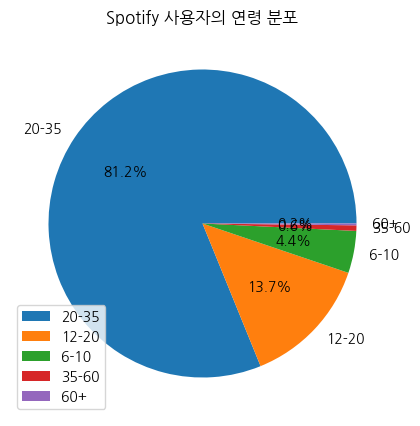

In [13]:
y=df['나이'].value_counts()
plt.figure(figsize=(5,5))
labels=['20-35','12-20','6-10','35-60','60+']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Spotify 사용자의 연령 분포')
plt.show()

In [14]:
df['성별'].value_counts()

성별
Female    391
Male      114
Others     15
Name: count, dtype: int64

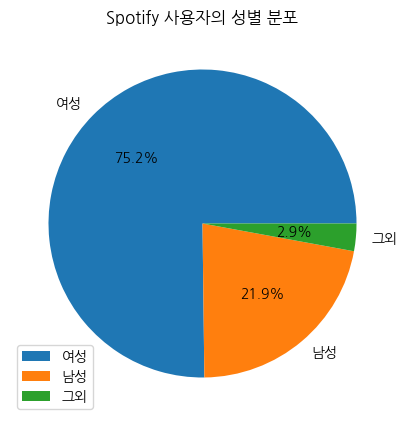

In [15]:
y=df['성별'].value_counts()
plt.figure(figsize=(5,5))
labels=['여성', '남성', '그외']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Spotify 사용자의 성별 분포')
plt.show()

<Axes: title={'center': 'Spotify 사용자의 연령대별 성별 분포'}, xlabel='나이', ylabel='count'>

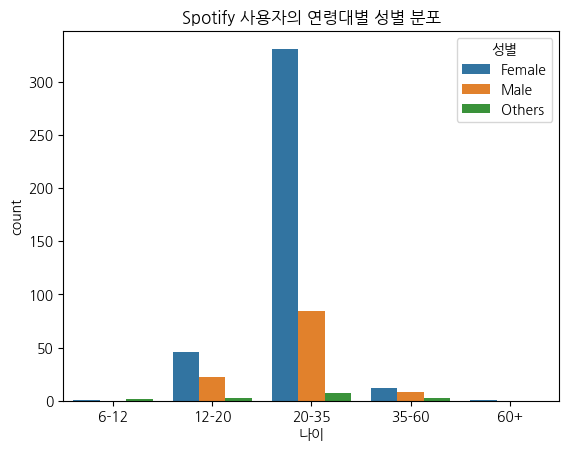

In [16]:
plt.title('Spotify 사용자의 연령대별 성별 분포')
sns.countplot(x='나이', data=df, hue='성별', order=['6-12', '12-20', '20-35', '35-60', '60+'])

## 성별 별로 차이점 확인 (서비스 지표, 선호도 조사)

### 서비스 지표

Text(0.5, 1.0, '성별 별 음악 청취 시간대')

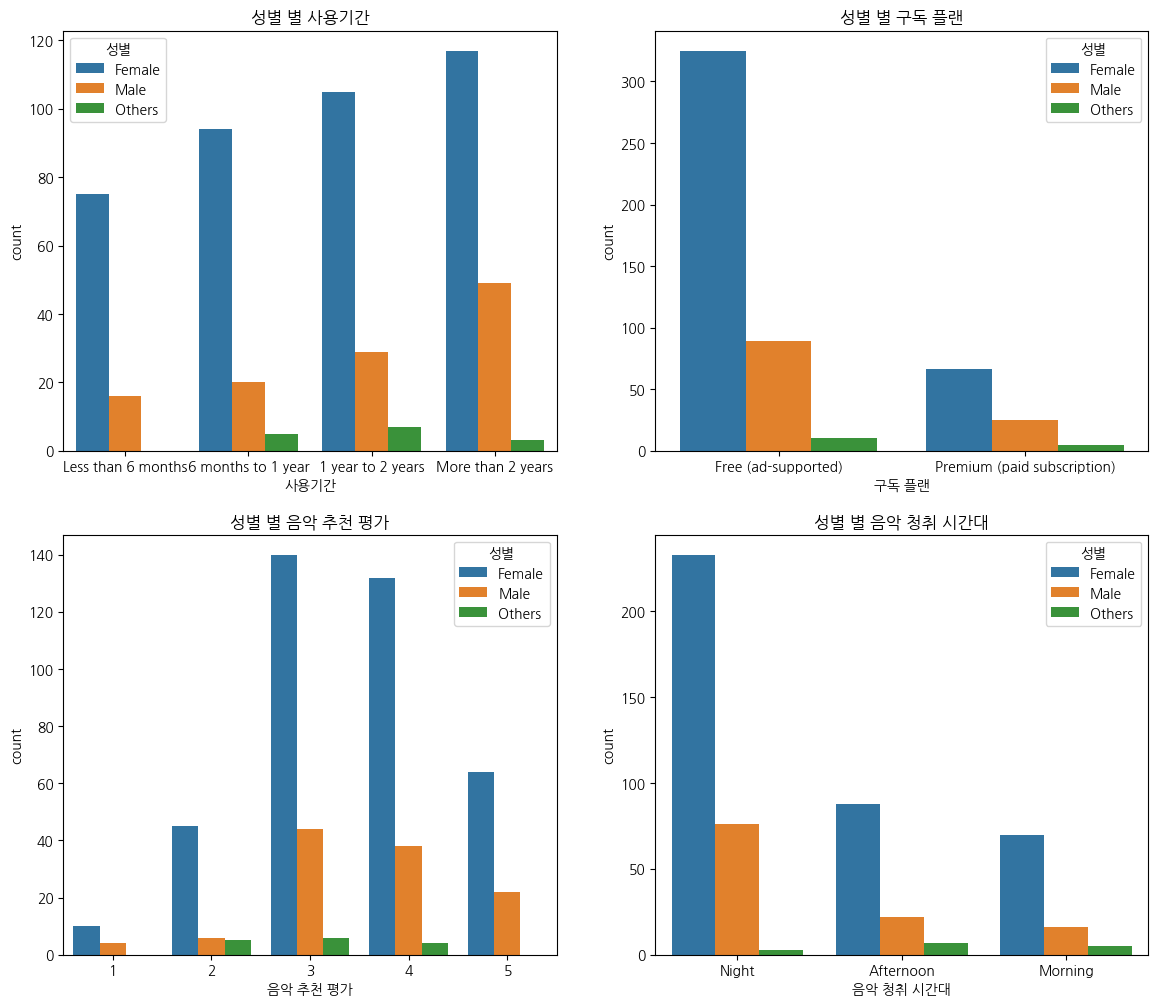

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='사용기간', data=df, hue='성별', 
              order=['Less than 6 months', '6 months to 1 year', '1 year to 2 years', 'More than 2 years'],
              ax=axes[0, 0])
axes[0, 0].set_title('성별 별 사용기간')

sns.countplot(x='구독 플랜', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('성별 별 구독 플랜')

sns.countplot(x='음악 추천 평가', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('성별 별 음악 추천 평가')

sns.countplot(x='음악 청취 시간대', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('성별 별 음악 청취 시간대')


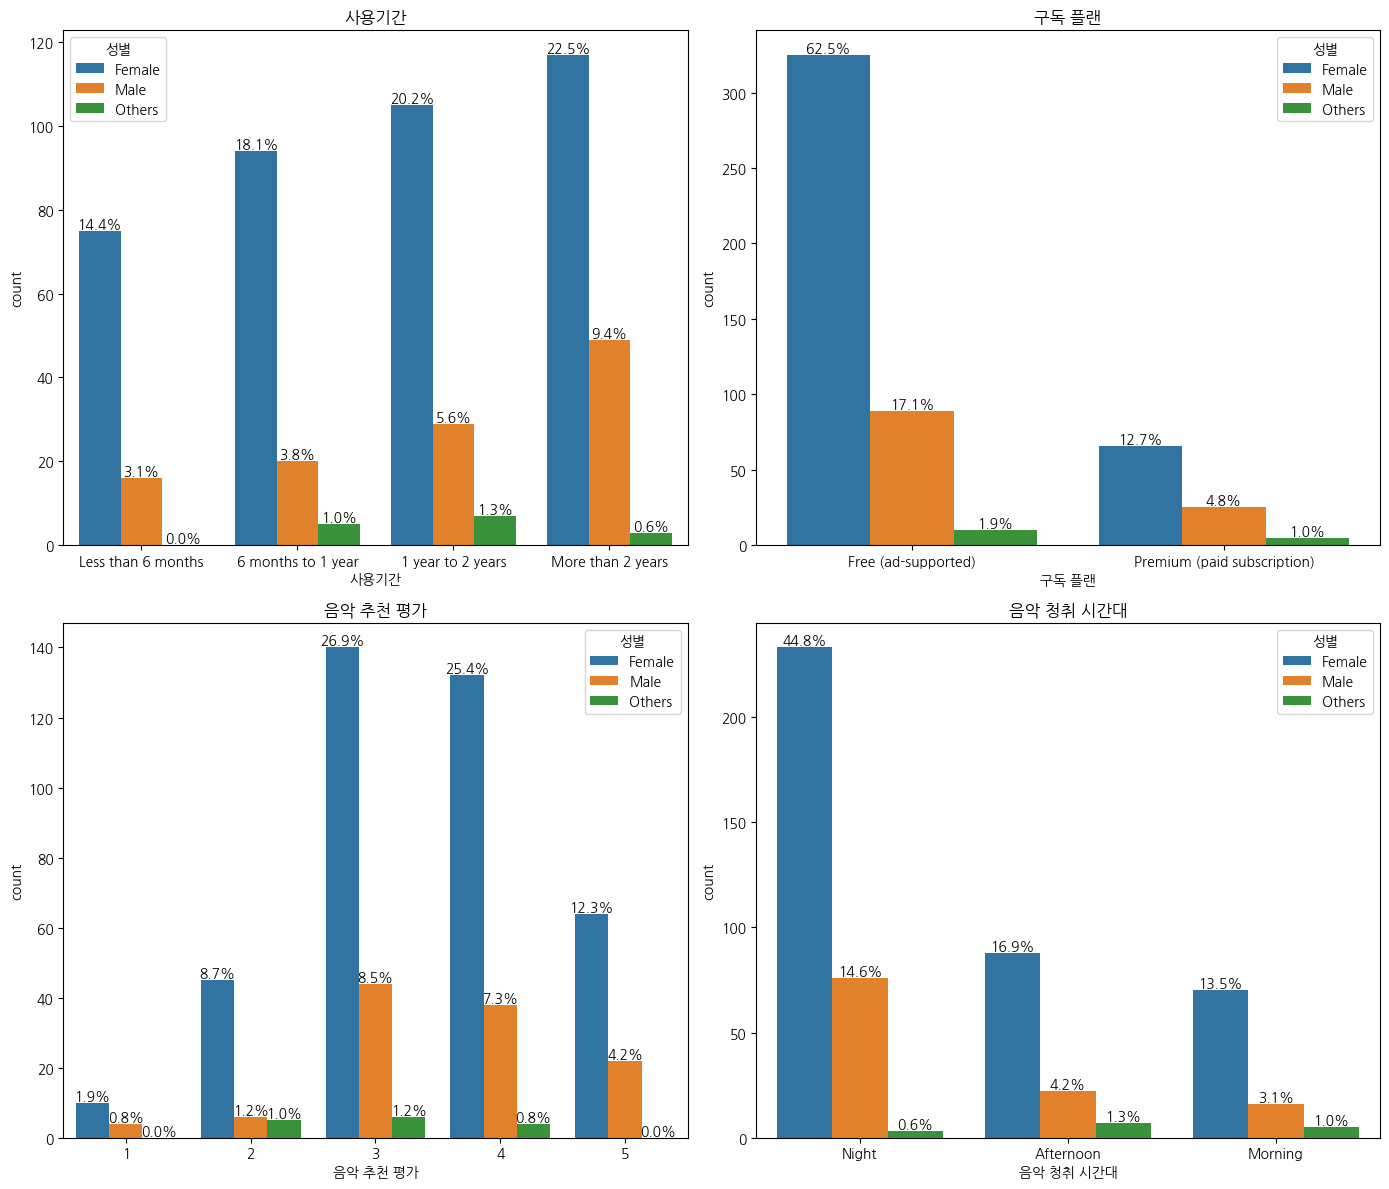

In [18]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='사용기간', data=df, hue='성별', order=['Less than 6 months', '6 months to 1 year', '1 year to 2 years', 'More than 2 years'], ax=axes[0, 0])
axes[0, 0].set_title('사용기간')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='구독 플랜', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('구독 플랜')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='음악 추천 평가', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('음악 추천 평가')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='음악 청취 시간대', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('음악 청취 시간대')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [19]:
# 성별, 구독 플랜 수 궁금
df.groupby(['구독 플랜', '성별']).size().reset_index(name='Count')

,구독 플랜,성별,Count
0,Free (ad-supported),Female,325
1,Free (ad-supported),Male,89
2,Free (ad-supported),Others,10
3,Premium (paid subscription),Female,66
4,Premium (paid subscription),Male,25
5,Premium (paid subscription),Others,5


In [20]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='음악 추천 평가', columns='성별', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

성별,음악 추천 평가,Female,Male,Others
0,1,0.025575,0.035088,0.000000
1,2,0.115090,0.052632,0.333333
2,3,0.358056,0.385965,0.400000
3,4,0.337596,0.333333,0.266667
4,5,0.163683,0.192982,0.000000


<Axes: xlabel='음악 추천 평가', ylabel='Female'>

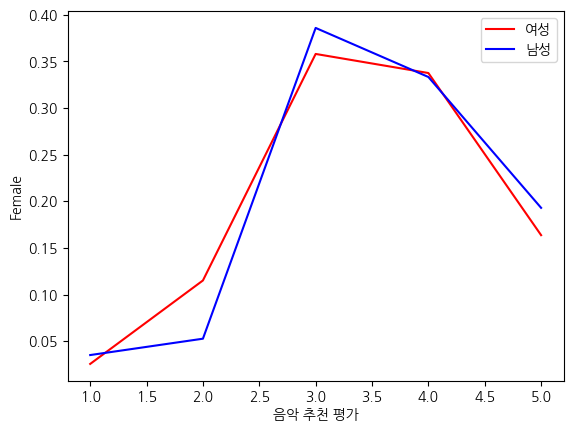

In [21]:
sns.lineplot(data=temp, x='음악 추천 평가', y='Female', color='red', label ='여성')
sns.lineplot(data=temp, x='음악 추천 평가', y='Male', color='blue', label='남성')

In [22]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='음악 청취 시간대', columns='성별', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

성별,음악 청취 시간대,Female,Male,Others
0,Afternoon,0.225064,0.192982,0.466667
1,Morning,0.179028,0.140351,0.333333
2,Night,0.595908,0.666667,0.200000


<Axes: xlabel='음악 청취 시간대', ylabel='Female'>

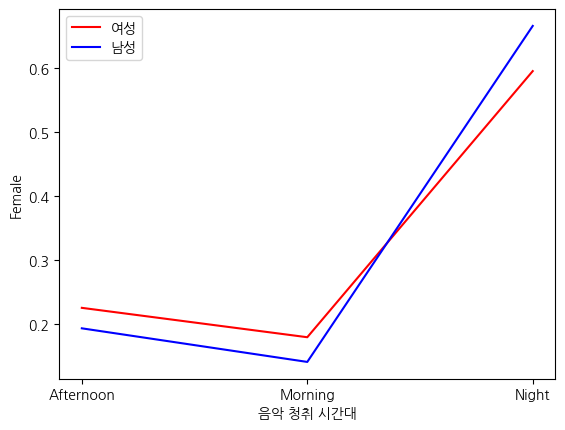

In [23]:
sns.lineplot(data=temp, x='음악 청취 시간대', y='Female', color='red', label ='여성')
sns.lineplot(data=temp, x='음악 청취 시간대', y='Male', color='blue', label='남성')

### 선호도 조사

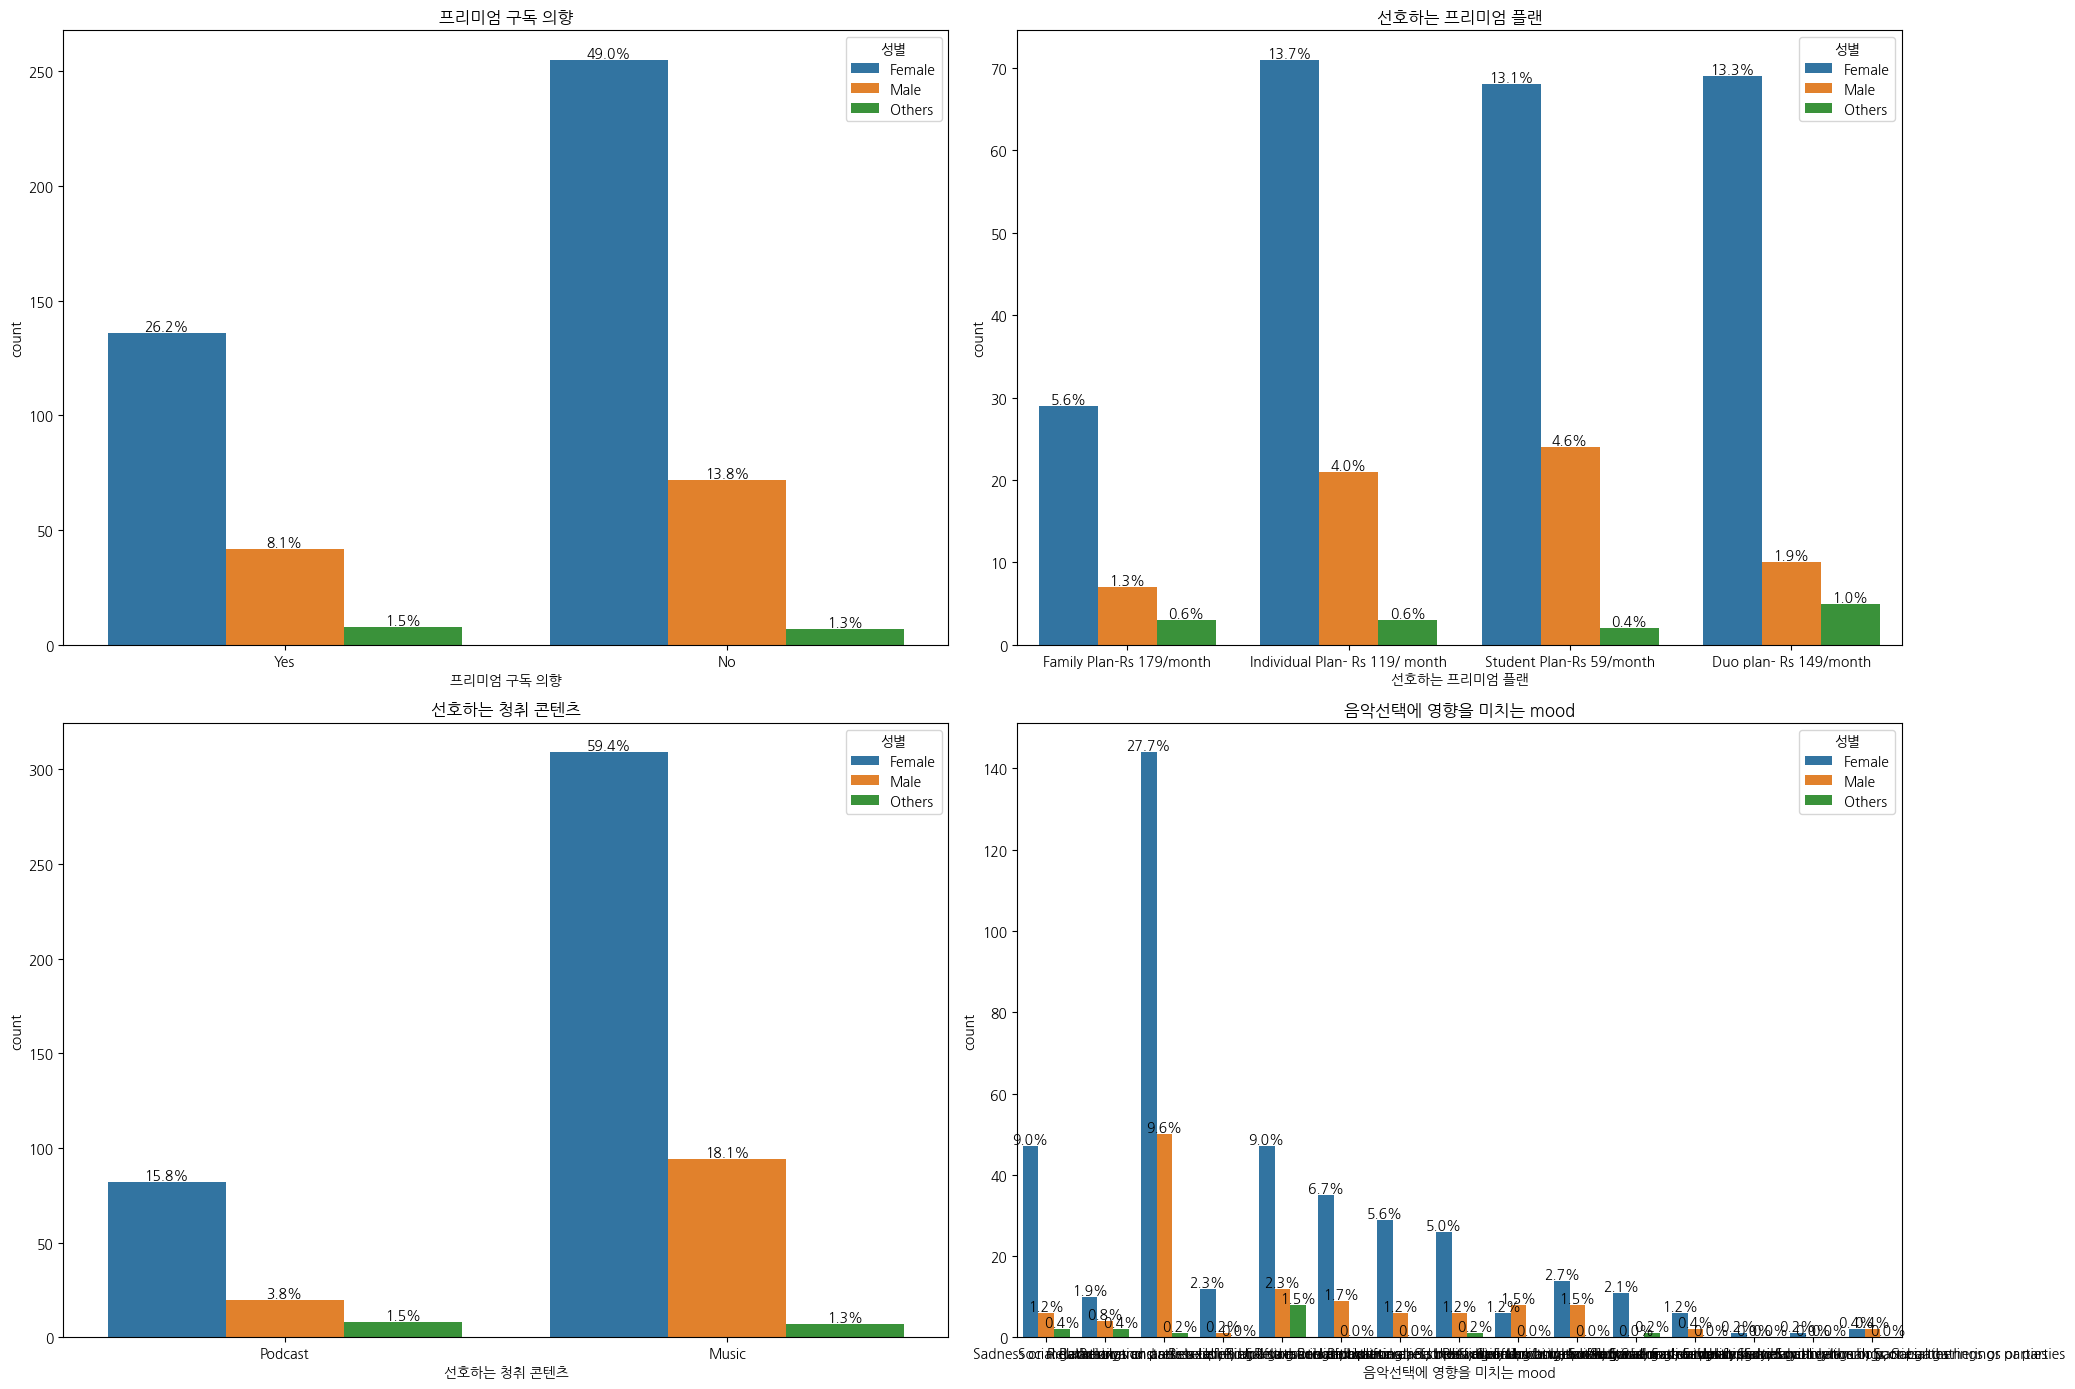

In [24]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 14))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='프리미엄 구독 의향', data=df, hue='성별', ax=axes[0, 0])
axes[0, 0].set_title('프리미엄 구독 의향')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 프리미엄 플랜', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('선호하는 프리미엄 플랜')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 청취 콘텐츠', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 청취 콘텐츠')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='음악선택에 영향을 미치는 mood', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('음악선택에 영향을 미치는 mood')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 팟캐스트

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   나이                  520 non-null    object
 1   성별                  520 non-null    object
 2   사용기간                520 non-null    object
 3   청취 디바이스             520 non-null    object
 4   구독 플랜               520 non-null    object
 5   프리미엄 구독 의향          520 non-null    object
 6   선호하는 프리미엄 플랜        312 non-null    object
 7   선호하는 청취 콘텐츠         520 non-null    object
 8   좋아하는 음악 장르          520 non-null    object
 9   음악 청취 시간대           520 non-null    object
 10  음악선택에 영향을 미치는 mood  520 non-null    object
 11  음악 청취 빈도            520 non-null    object
 12  음악 탐험 방법            520 non-null    object
 13  음악 추천 평가            520 non-null    int64 
 14  팟캐스트 청취 빈도          520 non-null    object
 15  선호하는 팟캐스트 장르        372 non-null    object
 16  선호하는 팟캐스트 형식        380 no

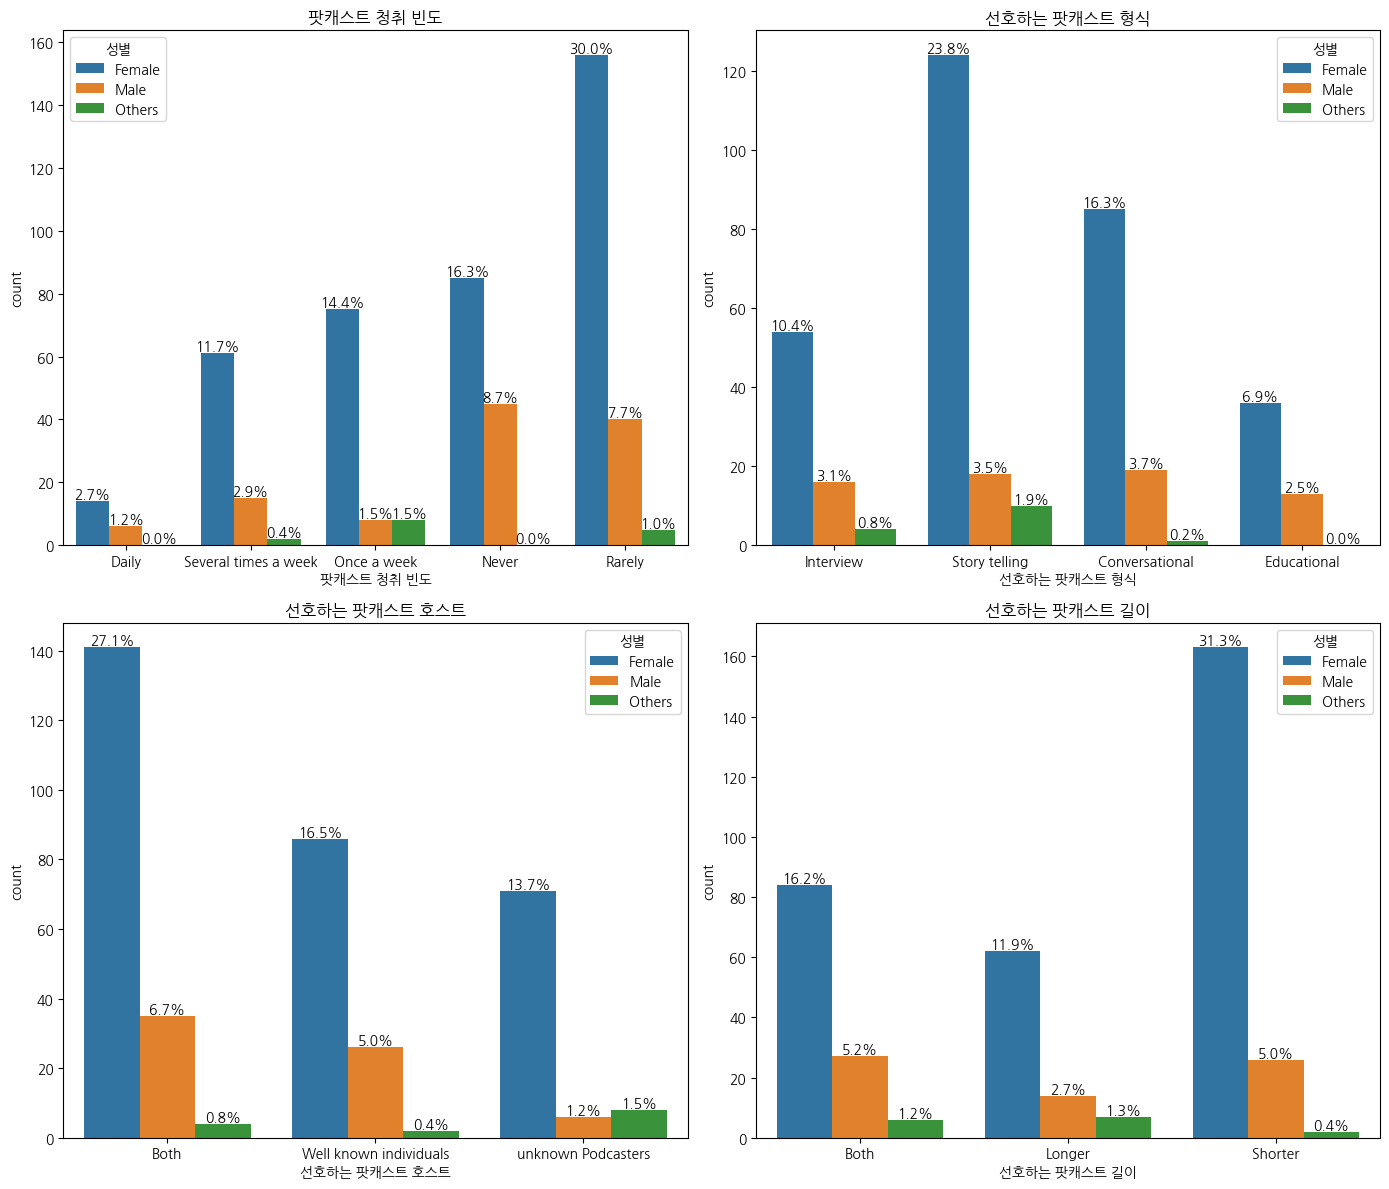

In [26]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='팟캐스트 청취 빈도', data=df, hue='성별', ax=axes[0, 0])
axes[0, 0].set_title('팟캐스트 청취 빈도')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 팟캐스트 형식', data=df, hue='성별', ax=axes[0, 1])
axes[0, 1].set_title('선호하는 팟캐스트 형식')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 팟캐스트 호스트', data=df, hue='성별', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 팟캐스트 호스트')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='선호하는 팟캐스트 길이', data=df, hue='성별', ax=axes[1, 1])
axes[1, 1].set_title('선호하는 팟캐스트 길이')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


## 사용기간 신규유저/장기 유저간의 차이점 확인 (서비스 지표로)

In [27]:
df['신규유저 유무'] = 'X'
df.loc[df['사용기간']== 'Less than 6 months', '신규유저 유무'] = 'O'

In [28]:
df['신규유저 유무'].value_counts()

신규유저 유무
X    429
O     91
Name: count, dtype: int64

In [29]:
df['사용기간'].value_counts().sort_index()


사용기간
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
More than 2 years     169
Name: count, dtype: int64

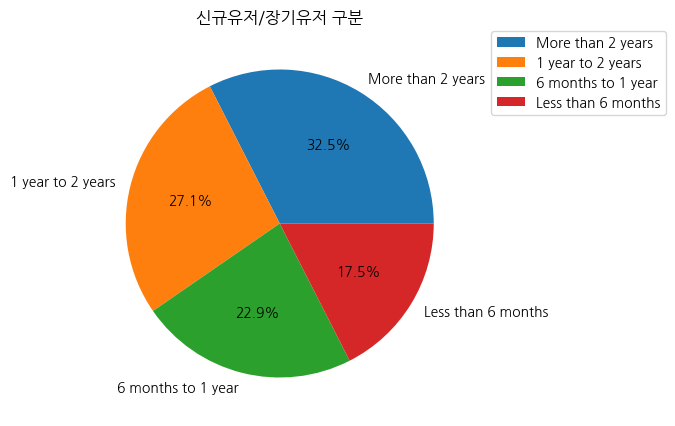

In [30]:
y=df['사용기간'].value_counts()
plt.figure(figsize=(5,5))
labels= ['More than 2 years', '1 year to 2 years', '6 months to 1 year', 'Less than 6 months']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('신규유저/장기유저 구분')
plt.show()

### 서비스 지표

Text(0.5, 1.0, '사용기간 별 음악 청취 시간대')

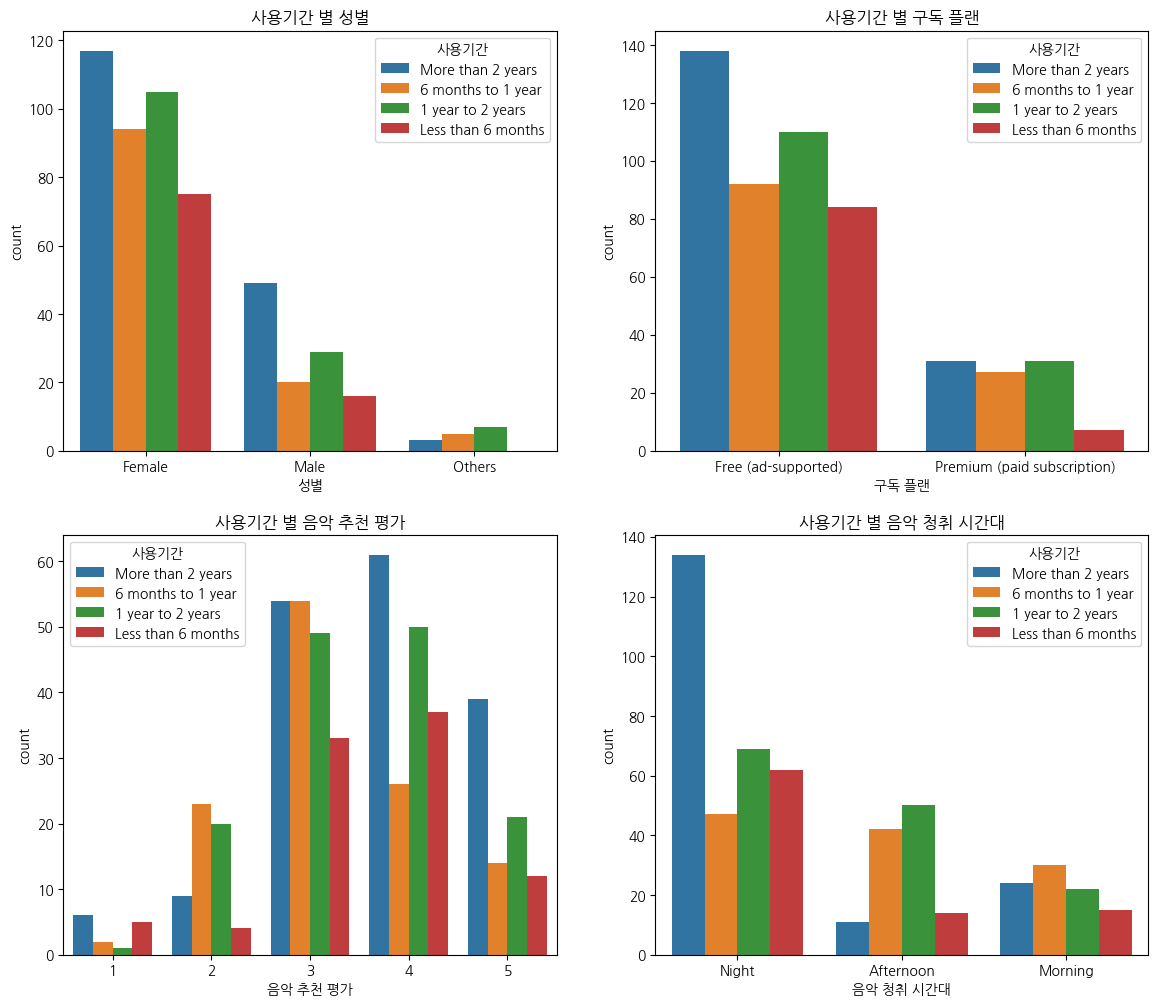

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='성별', data=df, hue='사용기간', ax=axes[0, 0])
axes[0, 0].set_title('사용기간 별 성별')

sns.countplot(x='구독 플랜', data=df, hue='사용기간', ax=axes[0, 1])
axes[0, 1].set_title('사용기간 별 구독 플랜')

sns.countplot(x='음악 추천 평가', data=df, hue='사용기간', ax=axes[1, 0])
axes[1, 0].set_title('사용기간 별 음악 추천 평가')

sns.countplot(x='음악 청취 시간대', data=df, hue='사용기간', ax=axes[1, 1])
axes[1, 1].set_title('사용기간 별 음악 청취 시간대')


### 선호도 조사

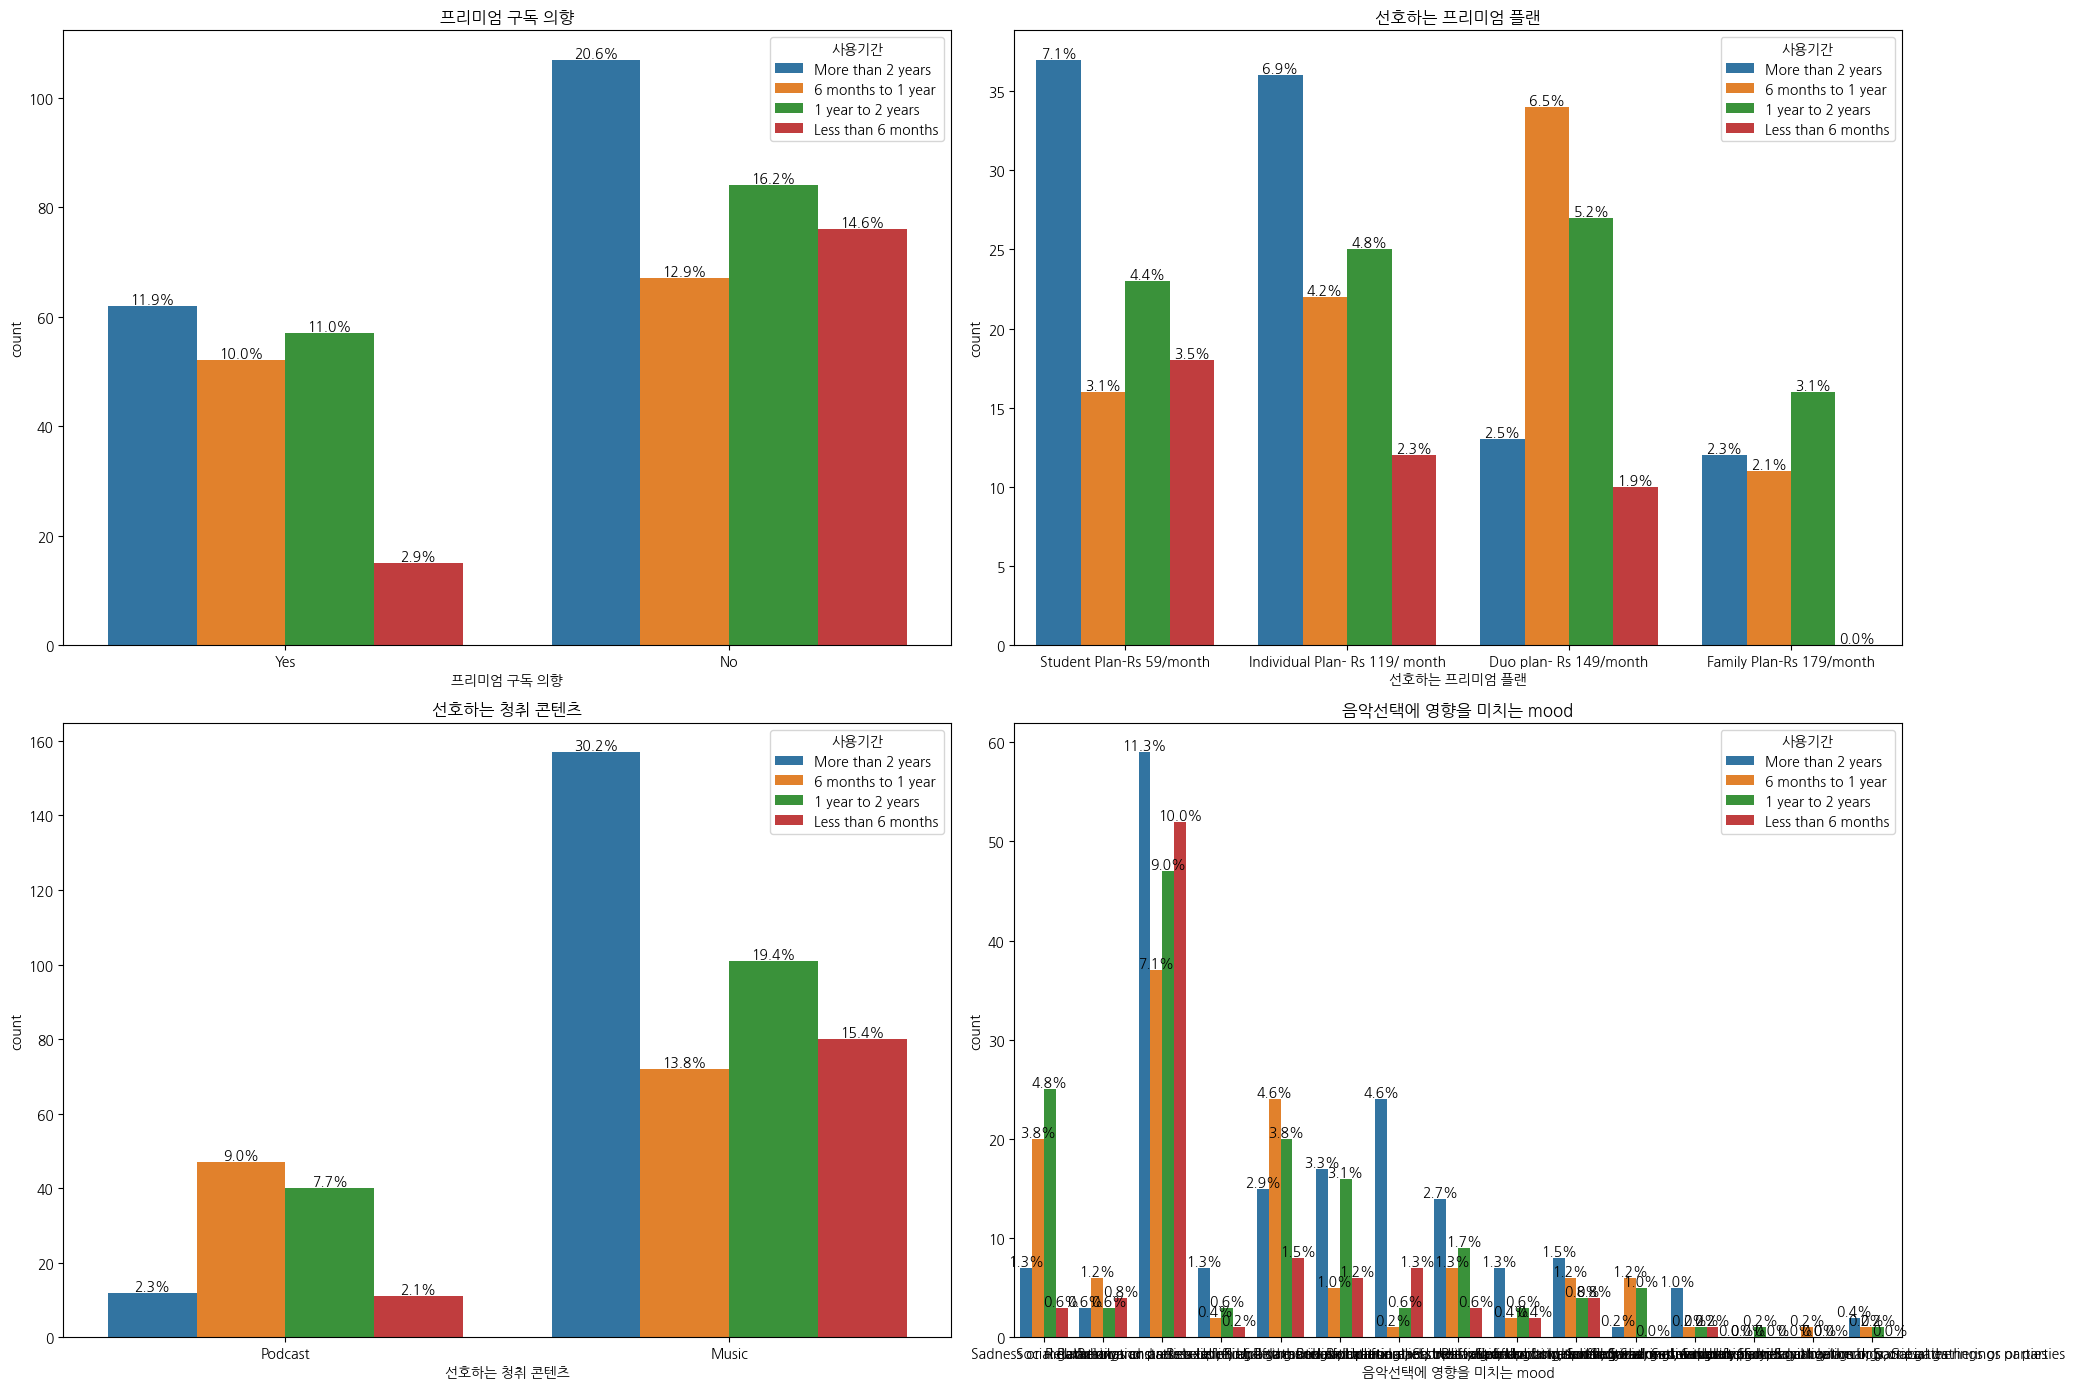

In [32]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 14))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='프리미엄 구독 의향', data=df, hue='사용기간', ax=axes[0, 0])
axes[0, 0].set_title('프리미엄 구독 의향')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 프리미엄 플랜', data=df, hue='사용기간', 
                    order = ['Student Plan-Rs 59/month', 'Individual Plan- Rs 119/ month', 'Duo plan- Rs 149/month', 'Family Plan-Rs 179/month'],
                    ax=axes[0, 1])
axes[0, 1].set_title('선호하는 프리미엄 플랜')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 청취 콘텐츠', data=df, hue='사용기간', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 청취 콘텐츠')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='음악선택에 영향을 미치는 mood', data=df, hue='사용기간', ax=axes[1, 1])
axes[1, 1].set_title('음악선택에 영향을 미치는 mood')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 팟캐스트

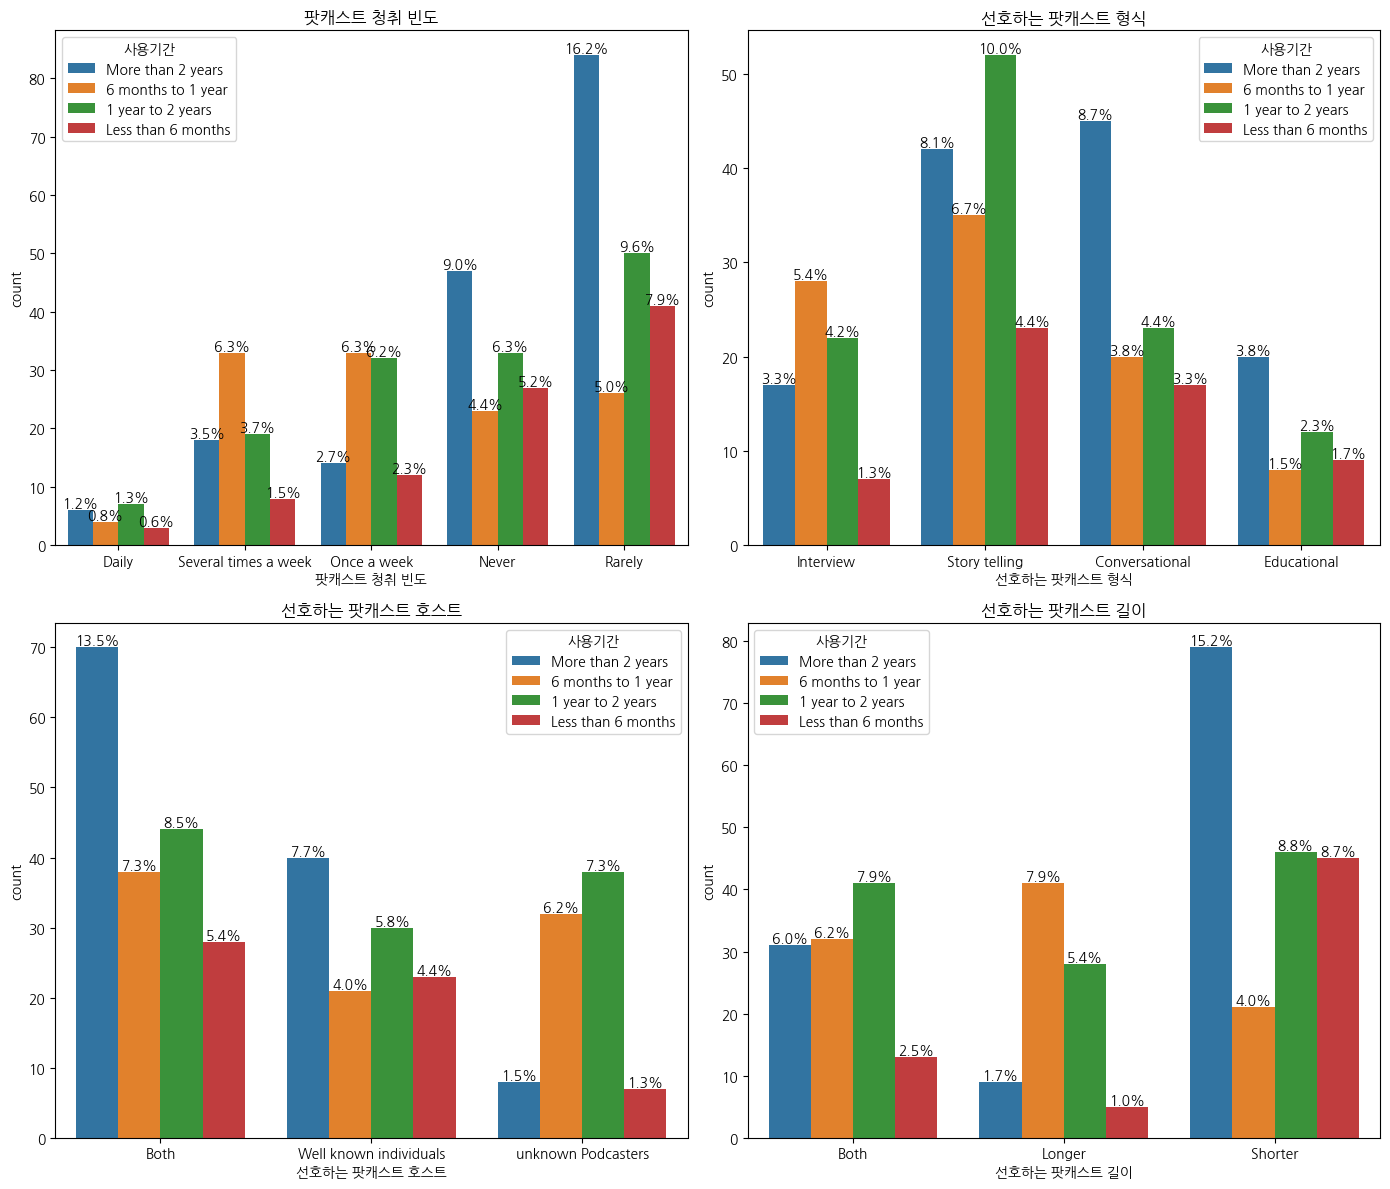

In [33]:
# 여러 개의 countplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# 첫 번째 subplot: 성별 별 사용기간
ax1 = sns.countplot(x='팟캐스트 청취 빈도', data=df, hue='사용기간', ax=axes[0, 0])
axes[0, 0].set_title('팟캐스트 청취 빈도')

# 두 번째 subplot: 성별 별 구독 플랜
ax2 = sns.countplot(x='선호하는 팟캐스트 형식', data=df, hue='사용기간', ax=axes[0, 1])
axes[0, 1].set_title('선호하는 팟캐스트 형식')

# 세 번째 subplot: 성별 별 음악 추천 평가
ax3 = sns.countplot(x='선호하는 팟캐스트 호스트', data=df, hue='사용기간', ax=axes[1, 0])
axes[1, 0].set_title('선호하는 팟캐스트 호스트')

# 네 번째 subplot: 성별 별 음악 청취 시간대
ax4 = sns.countplot(x='선호하는 팟캐스트 길이', data=df, hue='사용기간', ax=axes[1, 1])
axes[1, 1].set_title('선호하는 팟캐스트 길이')

# 각 막대 위에 비율 표시
for ax in [ax1, ax2, ax3, ax4]:
    total = len(df)  # 전체 데이터의 총 개수
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()
plt.show()


## 유료 구매 의향 있는 유저들은 왜?


In [34]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='음악 추천 평가', columns='프리미엄 구독 의향', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

프리미엄 구독 의향,음악 추천 평가,No,Yes
0,1,0.026946,0.026882
1,2,0.089820,0.139785
2,3,0.350299,0.392473
3,4,0.371257,0.268817
4,5,0.161677,0.172043


<Axes: xlabel='음악 추천 평가', ylabel='No'>

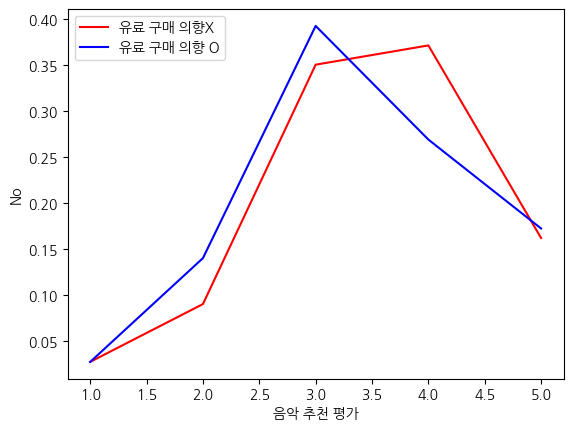

In [35]:
sns.lineplot(data=temp, x='음악 추천 평가', y='No', color='red', label ='유료 구매 의향X')
sns.lineplot(data=temp, x='음악 추천 평가', y='Yes', color='blue', label='유료 구매 의향 O')

In [36]:
# pivot_table을 사용하여 데이터프레임 변환
pivot_df = df.pivot_table(index='구독 플랜', columns='프리미엄 구독 의향', aggfunc='count', fill_value=0)
sex_rate = pivot_df['나이']
row_sum = sex_rate.sum(axis=0)
temp = sex_rate.div(row_sum, axis=1).reset_index()
temp

프리미엄 구독 의향,구독 플랜,No,Yes
0,Free (ad-supported),0.928144,0.612903
1,Premium (paid subscription),0.071856,0.387097


Text(0.5, 1.0, '프리미엄 구독 의향 별 음악 청취 시간대')

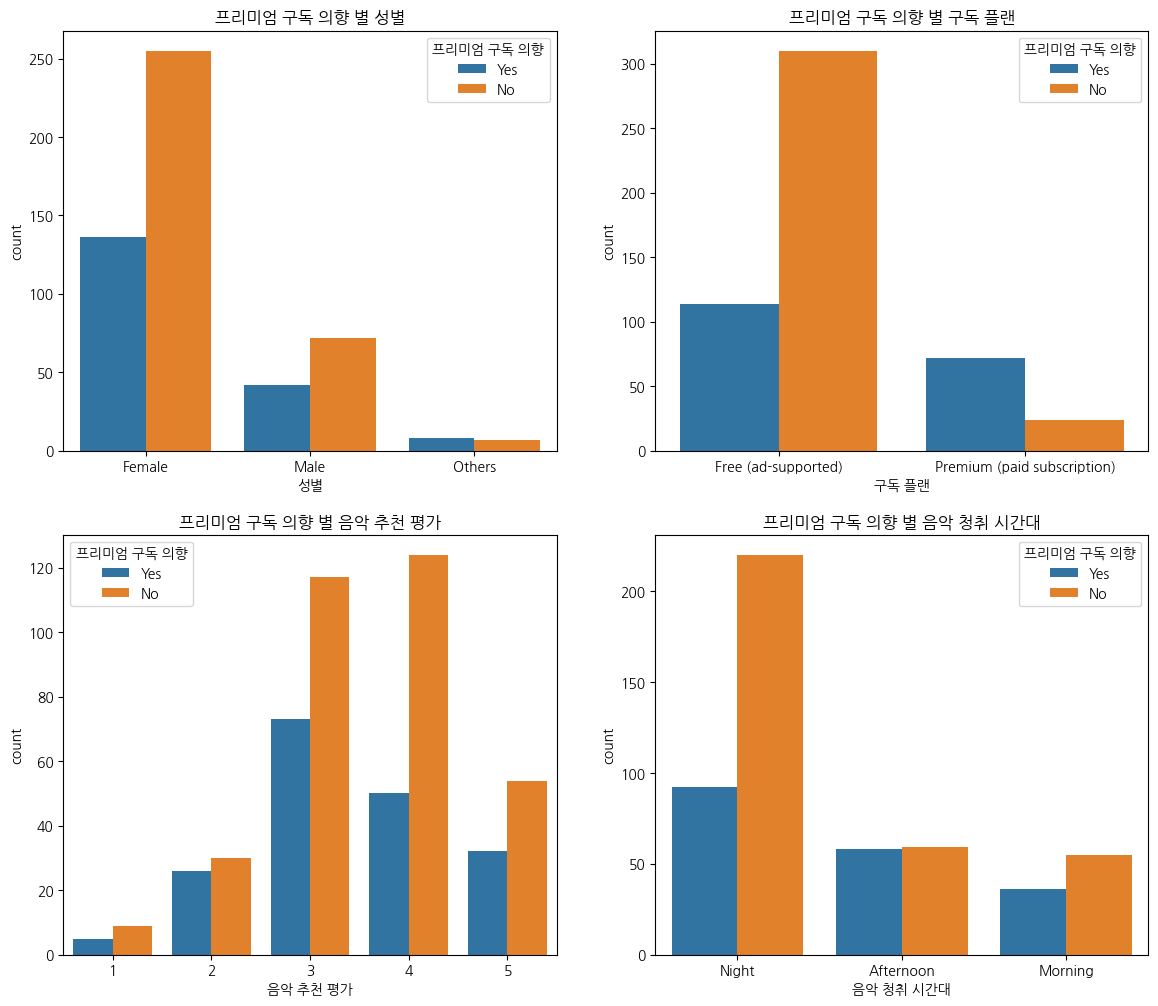

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.countplot(x='성별', data=df, hue='프리미엄 구독 의향', ax=axes[0, 0])
axes[0, 0].set_title('프리미엄 구독 의향 별 성별')

sns.countplot(x='구독 플랜', data=df, hue='프리미엄 구독 의향', ax=axes[0, 1])
axes[0, 1].set_title('프리미엄 구독 의향 별 구독 플랜')

sns.countplot(x='음악 추천 평가', data=df, hue='프리미엄 구독 의향', ax=axes[1, 0])
axes[1, 0].set_title('프리미엄 구독 의향 별 음악 추천 평가')

sns.countplot(x='음악 청취 시간대', data=df, hue='프리미엄 구독 의향', ax=axes[1, 1])
axes[1, 1].set_title('프리미엄 구독 의향 별 음악 청취 시간대')
